In [1]:
%pylab inline
%matplotlib inline


Populating the interactive namespace from numpy and matplotlib


We will be using the snwd_all_stations.pickle along with the stats.pickle, snwd_all_stations.pickle contains a list of (stationId, counts of non-nan measurements of each day for that station) pair

In [3]:
import pickle
Data1=pickle.load(open('../../Data/Weather/snwd_all_stations.pickle','r'))
STAT,STAT_description=pickle.load(open('../../Data/Weather/STAT.pickle','r'))


In [20]:
import copy
Data =  copy.copy(Data1)
print Data[0][0]


US1PAFY0006


In [21]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7)):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    plot_date(yearday,T, '-');
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b') )
    # rotate and align the tick labels so they look better
    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)
    

We count the number of unique stations

In [22]:
unique = len(Data)
print unique

34933


We calculate the overall average of counts of measurement per station, which turns out to be 12.2595895313. This means that on an average a station takes 12.2595895313 measurements per day.
We also plot the average count of measurement per station with day of the year.

12.2595895313


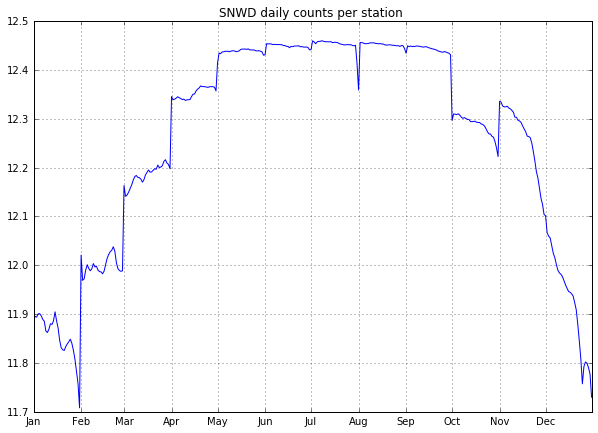

In [23]:
overalldailyavgperstation = sum(STAT['SNWD']['NE'])/unique
overalldailyavgperstation /=365
print overalldailyavgperstation
dailyperstation = STAT['SNWD']['NE']/unique
YearlyPlots(dailyperstation,"SNWD daily counts per station ")


We now study the behavior for the last 30 days of december and first 30 days of January

In [24]:
statList = STAT['SNWD']['NE'][-30:].tolist()+STAT['SNWD']['NE'][:30].tolist()
print len(statList)

60


We now calculate the overall average of counts of measurement per station for the period of 60 days(last 30 days of december and first 30 days of January), which turns out to be 11.8904. This means that on an average a station takes 11.8904 measurements per day over this period. We can clearly see that there is a decrease in the average from 12.2595895313 to 11.8904.

avg for last 30 days of december and first 30 days of january is  11.8904397943


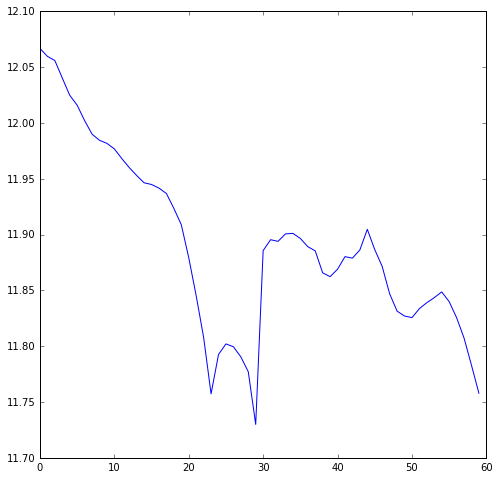

In [25]:
overall60avgperstation = sum(statList)/unique
overall60avgperstation /=60
print "avg for last 30 days of december and first 30 days of january is ",overall60avgperstation
daily60perstation = (numpy.array(statList))/unique
figure(figsize=(8,8))
plot(daily60perstation, '-')

for i in range(0,len(Data)):
    Data[i]= (Data[i][0],Data[i][1][-30:].tolist()+Data[i][1][:30].tolist())


In the above graph, we have plotted the average no. measurements per station over the period of last 30 days of December and first 30 days of January. We can see there is a more prominent decrease around Christmas and New Year, and at the end of month of January

In [26]:
percentageDecreaseOverall = (overalldailyavgperstation - overall60avgperstation)*100/overalldailyavgperstation
print "overall percentage decrease is ", percentageDecreaseOverall

origData = copy.copy(Data1)
data60 = copy.copy(Data)

stationsdecrease =[]
stationsless = []
stationsmore = []
for i in range(0,len(origData)):
    overallavg = sum(origData[i][1])/365
    avg60 = sum(data60[i][1])/60
    if overallavg > avg60:
        stationsdecrease.append(origData[i][0])
        percentage = (overallavg- avg60)*100/overallavg
        if percentage > percentageDecreaseOverall:
            stationsless.append((origData[i][0],percentage))
    elif overallavg!=0:
        percentage = (avg60-overallavg)*100/overallavg
        if percentage > percentageDecreaseOverall:
            stationsmore.append((origData[i][0],percentage))
     
    
print "# of stations which see decrease are ",len(stationsdecrease)
print "# of stations which see more percentage decrease than average percentage decrease are ",len(stationsless)

overall percentage decrease is  3.01111008698
# of stations which see decrease are  9075
# of stations which see more percentage decrease than average percentage decrease are  7356


Final Analysis: The reason for these lower counts is the Winter season. In the yearly graph we can clearly see that, in the summers there are more measurements and it starts to decrease as the winter season sets in and temperature starts to decrease, and it starts to rise again as the temperature starts to increase and is again at its maximum in the summers.

I have done analysis over period of last 30 days of December and first 30 days of January. According to my analysis the number of stations which see a percentage decrease in average count of daily measurements over this period compared to their average count of daily measurements overall the year are (9075*100/34933) = 25.9 %. Also the # of stations which see more % decrease than average % decrease over this period are 7356 which is ~ 21 %. So we can see this effect is seen in ~25 % the stations. And I think these stations are where a lot of snowfall occurs as because due to large amount of snow in winter, it might be more difficult to fix the faults for the humans in exreme cold conditions in these stations.

I think there is no way to remove this effect, as there seems to be gradual decrease in the number of counts for such stations due to high cold. So, there is no way we can remove this effect.
